This datamining project is made as part of our yearly project. 

The goal of this project is to determine whether or not a tweet contains actuality content.

Our dataset contains tweet collected mid february with the following informations :

- id of the tweet

User related information :
- user's number of followers
- number following
- if the user is verified
- reputation of the user (number of follower / (number of follower + number following))
- user's creation date
- user's number of tweet

Tweet related information :
- creation date of the tweet 
- text
- length of the tweet
- spellchecking
- number of url present in the tweet
- number of hashtags in the tweet
- number of emojis in the tweet
- number of named-ids in the tweet

Variable to predict :
- if the tweet is a spam
- what is the type of the tweet (between actuality, reaction to actuality, private conversation between users, publicity, bot or unclassified spam)



In [2]:
import pandas as pd

df = pd.read_csv('data_dac.csv', sep = ',', header = 0, error_bad_lines=False, date_parser=['posted_at'])

b'Skipping line 75: expected 17 fields, saw 18\nSkipping line 106: expected 17 fields, saw 18\nSkipping line 138: expected 17 fields, saw 18\nSkipping line 165: expected 17 fields, saw 18\nSkipping line 166: expected 17 fields, saw 19\nSkipping line 187: expected 17 fields, saw 19\nSkipping line 261: expected 17 fields, saw 18\nSkipping line 269: expected 17 fields, saw 19\nSkipping line 339: expected 17 fields, saw 19\nSkipping line 702: expected 17 fields, saw 19\nSkipping line 731: expected 17 fields, saw 18\nSkipping line 773: expected 17 fields, saw 18\nSkipping line 844: expected 17 fields, saw 19\nSkipping line 1262: expected 17 fields, saw 18\nSkipping line 1293: expected 17 fields, saw 18\nSkipping line 1323: expected 17 fields, saw 20\nSkipping line 1577: expected 17 fields, saw 18\nSkipping line 1685: expected 17 fields, saw 19\nSkipping line 1967: expected 17 fields, saw 18\nSkipping line 1973: expected 17 fields, saw 18\nSkipping line 2102: expected 17 fields, saw 18\nSkip

On remarque que beaucoup de lignes sont sautées en raison d'un nombre incorrect d'arguments.
On va regarder plus en détails les lignes de notre dataframe pour nous assurer qu'elles sont cohérentes.

In [3]:
print(df.head())

                    id nb_follower nb_following  verified  reputation     age  \
0  1095597318752137216        3027         2738       0.0        0.53   605.0   
1  1095597327140732929          79          211       0.0        0.27   660.0   
2  1095597331343437825        3163         2831       0.0        0.53   163.0   
3  1095597348099629056         675          545       0.0        0.55  2772.0   
4  1095597364889432064         217          140       0.0        0.61   309.0   

   nb_tweets posted_at                                               text  \
0    51879.0  08:15:30  RT@ frenchweb: [INSIDERS] Robots livreurs : #S...   
1      977.0  08:15:32  Si les francais excédés persistent à faire un ...   
2    15701.0  08:15:33  « Allô, les #pompiers ? Mon hamster a fait un ...   
3    15864.0  08:15:37                       je me suis dit la meme chose   
4    13736.0  08:15:41  Partout je vois leur photo oue doguracak oue h...   

  length orthographe  nb_urls  nb_hashtag  nb_emoj

In [4]:
#print(df.info())
#print(df.describe())

Les chiffres que l'on observe pour les différentes features semblent cohérents hormis pour la colonne verified où l'on a une valeur maximale de 140 là ou on ne devrait avoir que 1 comme valeur maximale. On observe aussi que l'on perd 22 enregistrement entre les colonnes du début et de la fin. On va donc visualiser les colonnes qui n'ont pas d'entrées pour 'named_id' afin de voir mieux ce qui se passe

In [4]:
print(df[df.isnull().named_id])

                                                     id  \
645                                 1095621918361817088   
646                         Q… https://t.co/UsnncZjyus"   
937                                 1095655351129595904   
938   Jusqu'au 2 mars. Tous les jours (sauf le lundi...   
939                                                 ///   
940                Merci à fr… https://t.co/54gPp5B56M"   
971                                 1095655627949522944   
972   Les artistes sont condamner a se faire voler l...   
1307                                1095659004372705281   
1308                                       2s plus tard   
1309  Ptdr regarde ton @",121,0.40,0,0,1,3,conversat...   
1375                                1095659604166483973   
1376           Retrouvez l'interview de @SergeOllivier2   
1916                                1095689341769314304   
1917                     Moi : https://t.co/6q9duy2j6e"   
2070                                1095690885289922561 

On voit que dans les retours à la ligne dans certains tweets entrainent un retour à la ligne dans notre dataframe. Comme on n'arrive pas facilement à modifier cela et que moins de 1% des lignes sont concernées on va simplement supprimer ces lignes. 

On va également changer les types des series 'nb_follower','nb_following','length' et 'orthographe' qui sont pour l'instant reconnue comme des objets alors qu'il s'agit d'entiers ou flottant.

In [5]:
df = df[df.named_id.notnull() == True ]
df.nb_follower = df.nb_follower.astype('int32')
df.nb_following = df.nb_following.astype('int32')
df.length = df.length.astype('int32')
df.orthographe = df.orthographe.astype('float64')

In [6]:
#print(df.info())
print(df.describe())

        nb_follower  nb_following     verified   reputation          age  \
count  3.355000e+03   3355.000000  3355.000000  3355.000000  3355.000000   
mean   5.598568e+03    572.107303     0.015499     0.507398  1451.023249   
std    1.415960e+05   1057.180939     0.123546     0.263923  1066.567122   
min    0.000000e+00      0.000000     0.000000     0.000000    12.000000   
25%    7.700000e+01    111.000000     0.000000     0.300000   446.500000   
50%    2.850000e+02    258.000000     0.000000     0.510000  1343.000000   
75%    9.410000e+02    581.500000     0.000000     0.700000  2317.000000   
max    8.060539e+06  24763.000000     1.000000     1.000000  4302.000000   

          nb_tweets       length  orthographe      nb_urls   nb_hashtag  \
count  3.355000e+03  3355.000000  3355.000000  3355.000000  3355.000000   
mean   4.845011e+04    79.183905     0.609666     0.322206     0.140984   
std    6.050546e+05    42.886697     0.221883     0.477488     0.606641   
min    1.000000

Les informations semblent maintenant pertinentes (valeur maximal, minimale...) et les counts sont bien homogènes. 

Nous allons donc commencer à analyser le data set. 

La première chose que nous allons regarder est la proportion de spam et non spam présents.

In [7]:
print(df.groupby('spam').nb_follower.count())

spam
False     435
True     2920
Name: nb_follower, dtype: int64


On voit donc que nous avons un dataset très déséquilibrés. Ceci nous semble logique au vu de la définition très large que nous avons de spam. En effet elle inclue tout ce qui n'est pas de l'actualité ou réaction à de l'actualité, 87% de spam semble donc une observation cohérente après avoir regarder un fil twitter. 
Néanmoins il est aussi important de noter que ce déséquilibre de classe peut être problématique pour les modèles que nous allons construire. Il va donc être necessaire de travailler sur ça soit par l'undersampling, soit par l'oversampling, soit en redivisant la classe spam en sous classe de plus petite taille.

On peut ensuite passer à la visualisation.

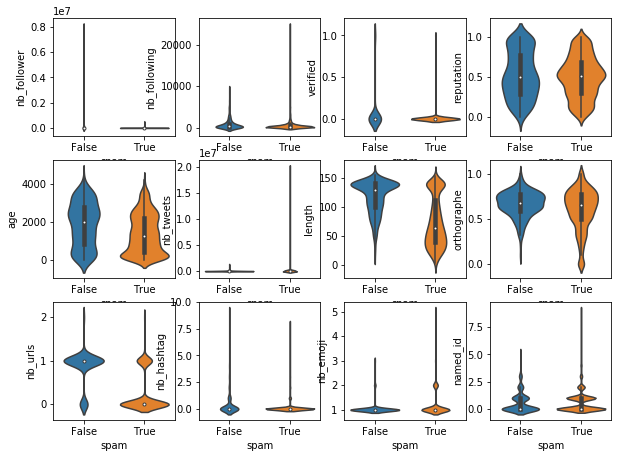

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def viz_param_cat(df,categorie):
    plt.figure(figsize=(10, 10))
    columns = ['nb_follower', 'nb_following', 'verified', 'reputation', 'age','nb_tweets', 
               'length', 'orthographe', 'nb_urls','nb_hashtag', 'nb_emoji', 'named_id']
    for column_index, column in enumerate(columns):
        plt.subplot(4, 4, column_index + 1)
        sns.violinplot(x=categorie, y=column, data=df)
    plt.show()
    
viz_param_cat(df, 'spam')

Cet affichage nous permet de voir quels sont les paramètres qui semblent permettre de bien différencier les tweets de spam et d'actualité. A priori il s'agirait des paramètres de longueur du tweet, orthographe et nombre d'url.
En outre, comme les graphs des paramètres du nombre de follower, nombre de following et nombre de tweet ne sont pas très lisibles à cause des valeurs extrêmes vers le haut on va aussi les réafficher en enlevant les 10% des valeurs les plus importantes.

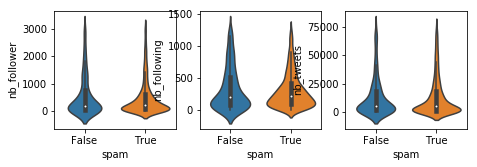

In [13]:
import numpy as np 

def viz_param_cat(df,categorie):
    plt.figure(figsize=(10, 10))
    columns = ['nb_follower', 'nb_following', 'nb_tweets']
    for column_index, column in enumerate(columns):
        Q3 = np.percentile(df[column], 90)
        plt.subplot(4, 4, column_index + 1)
        sns.violinplot(x=categorie, y=column, data=df[df[column]<Q3])
    plt.show()
    
viz_param_cat(df, 'spam')

Après visualisation plus précise des paramètres de nombre de followers, following et nombre de tweets il semble que ce paramètre soit assez peu discriminant dans la différenciation de spam et actualité. On notera cependant que même en supprimant les 10% des valeurs les plus élevées on observe encore un effet 'queue', les valeurs sont regroupée vers le bas de l'échelle. Cela montre que ces paramètres prennent des champs de valeurs très étendues.

Si on souhaite les intégrer à un modeles il sera donc nécessaire de procéder à une normalisation en prenant bien garde a ne pas écraser les valeurs vers 0.

En outre pour mieux voir les repartitions pour les paramètres "verified", "nb_hastag", "nb_emoji" on affiche les nombres pour chaque valeurs (en fonction de s'il s'agit d'un spam ou non)

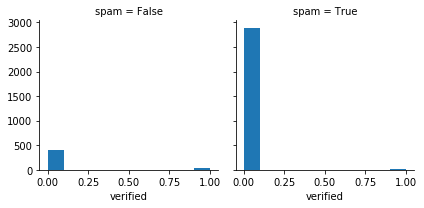

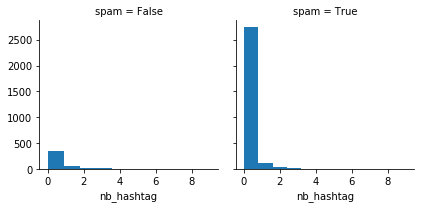

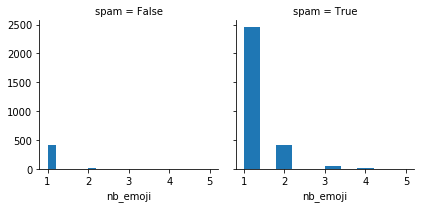

In [16]:
def viz_param (df,col, param):
    for parametre in param :
        g = sns.FacetGrid(df, col=col)
        g.map(plt.hist, parametre)
    plt.show()
    
viz_param(df,'spam',['verified','nb_hashtag','nb_emoji'])

On va ensuite regarder la corrélation entre les différents paramètres afin de voir si cela semble logique et si certains semblent redondants.

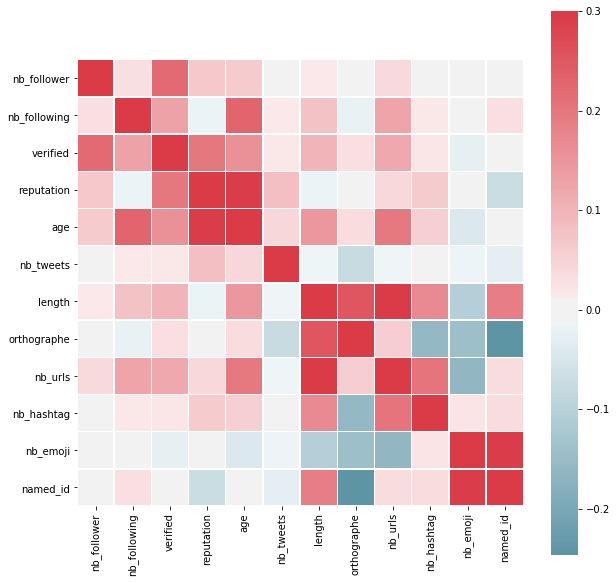

In [18]:
def correlation(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(10, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)
    plt.show()
    #print(corr)

correlation(df)

On observe quelques corrélations entre les paramètres relatifs au contenu du tweet (longueur, nombre d'url, de hashtag, d'emoji, d'identité nommé...) et entre les paramètres relatifs à l'utilisateur (age, reputation, nombre de followers..).

La plus forte corrélation s'observe entre le nombre d'url et la longueur ce qui nous semble logique puisqu'avoir un url dans un tweet augmente considérablement sa longueur.

Si jamais nous avions besoin de réduire les dimensions les correlations que l'on observe pourrait nous permettre de procéder à un PCA sur les 2 groupes de paramètres correlés.